In [1]:
# import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
data = pd.read_csv("./GG3 finals python dataset stackoverflow.csv")
data.head(2)

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
0,27733458,3769827.0,NaN,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398.0,1371484.0,2015-01-05 20:30:31.057000 UTC,1.0,1.0,False
1,27734669,2238969.0,NaN,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284.0,3624307.0,2015-01-03 02:56:46.553000 UTC,1.0,2.0,False


# EDA & Data Preparation
Exploring the dataset to check the data characteristic and preparing the dataset to make the analysis better

In [3]:
# check the data column existed, data type of each column, and the null value existed in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   question_id              6795 non-null   int64  
 1   question_owner_user_id   6761 non-null   float64
 2   question_owner_location  2770 non-null   object 
 3   question_title           6795 non-null   object 
 4   question_body            6795 non-null   object 
 5   question_created_date    6795 non-null   object 
 6   question_score           6795 non-null   int64  
 7   question_tag             6795 non-null   object 
 8   answer_id                6393 non-null   float64
 9   answerer_user_id         6385 non-null   float64
 10  answer_created_date      6393 non-null   object 
 11  answer_score             6393 non-null   float64
 12  answer_comment_count     6393 non-null   float64
 13  is_accepted_answer       6795 non-null   bool   
dtypes: bool(1), float64(5), 

In [4]:
# check the statistics of the data
data.describe(include="all")

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer
count,6.795000e+03,6.761000e+03,2770,6795,6795,6795,6795.000000,6795,6.393000e+03,6.385000e+03,6393,6393.000000,6393.000000,6795
unique,NaN,NaN,478,4597,4597,4597,NaN,3,NaN,NaN,6393,NaN,NaN,2
top,NaN,NaN,"San Francisco, CA, United States",Setting GOOGLE_APPLICATION_CREDENTIALS for Big...,<p>I'm trying to connect to Google BigQuery th...,2016-02-02 17:26:59.407000 UTC,NaN,bq,NaN,NaN,2015-01-05 20:30:31.057000 UTC,NaN,NaN,False
freq,NaN,NaN,82,15,15,15,NaN,6600,NaN,NaN,1,NaN,NaN,4088
mean,3.968053e+07,4.159195e+06,NaN,NaN,NaN,NaN,3.128477,NaN,4.221188e+07,3.987739e+06,NaN,2.697794,1.291412,NaN
std,5.535645e+06,2.513039e+06,NaN,NaN,NaN,NaN,6.916284,NaN,8.601282e+06,2.825050e+06,NaN,6.300766,2.075850,NaN
min,2.773346e+07,1.109000e+03,NaN,NaN,NaN,NaN,-6.000000,NaN,2.775128e+07,4.279000e+03,NaN,-8.000000,0.000000,NaN
25%,3.541621e+07,1.934510e+06,NaN,NaN,NaN,NaN,0.000000,NaN,3.665496e+07,1.366527e+06,NaN,0.000000,0.000000,NaN
50%,4.037780e+07,4.193886e+06,NaN,NaN,NaN,NaN,1.000000,NaN,4.170803e+07,4.490873e+06,NaN,1.000000,0.000000,NaN
75%,4.437723e+07,6.156032e+06,NaN,NaN,NaN,NaN,3.000000,NaN,4.593654e+07,5.221944e+06,NaN,3.000000,2.000000,NaN


In [5]:
# check the null value existed from each row
data.isnull().sum()

question_id                   0
question_owner_user_id       34
question_owner_location    4025
question_title                0
question_body                 0
question_created_date         0
question_score                0
question_tag                  0
answer_id                   402
answerer_user_id            410
answer_created_date         402
answer_score                402
answer_comment_count        402
is_accepted_answer            0
dtype: int64

In [6]:
# check total row and column from the dataset
print(f'Data row        : {data.shape[0]}',
      f'Data columns    : {data.shape[1]}', sep='\n')

Data row        : 6795
Data columns    : 14


In [7]:
# check how much unique question id in the data
data['question_id'].nunique()

4597

In [8]:
# check how much unique user id in the data
data['question_owner_user_id'].nunique()

2337

In [9]:
# see the date question have been made for question with null value
pd.to_datetime(data[data['question_owner_user_id'].isnull()]['question_created_date']).dt.date

43      2015-01-17
44      2015-01-17
410     2015-05-01
884     2015-08-26
1632    2016-02-03
1662    2016-02-09
1663    2016-02-09
1664    2016-02-09
1900    2016-03-26
1901    2016-03-26
1902    2016-03-26
1905    2016-03-26
1906    2016-03-26
1907    2016-03-26
1908    2016-03-26
2603    2016-07-20
2797    2016-08-12
2963    2016-08-31
2964    2016-08-31
4625    2017-04-12
4783    2017-04-28
4784    2017-04-28
4797    2017-05-01
4852    2017-05-09
6249    2017-10-23
6337    2017-11-01
6338    2017-11-01
6339    2017-11-01
6412    2017-11-09
6497    2017-11-20
6599    2017-11-30
6687    2017-12-12
6688    2017-12-12
6689    2017-12-12
Name: question_created_date, dtype: object

In [10]:
# replace the null value from quetion_owner_location column into 'unknown'
data['question_owner_location'].replace(to_replace=np.NAN, value="unknown", inplace=True)
data['question_owner_location'].isnull().sum()

0

In [11]:
# check, when is the first question asked
data['question_created_date'].min()

'2015-01-01 18:31:22.693000 UTC'

In [12]:
# check, when is the latest question asked
data['question_created_date'].max()

'2017-12-31 01:39:02.950000 UTC'

In [13]:
# check the sum of unique value in question_score column
data['question_score'].nunique()

48

In [14]:
# check the sum of each value in question_score column
data['question_score'].value_counts()

question_score
 0      1960
 1      1692
 2       985
 3       614
 4       302
 5       212
 6       152
 7       104
 8        84
 10       83
 9        79
 11       72
-1        72
 16       33
 14       31
 12       30
 13       28
 15       27
 24       27
 19       19
-2        17
 21       16
 57       15
 41       14
 17       12
 20       12
 23       11
 18       11
 28       10
 61        8
 22        8
 30        6
 31        6
 98        5
 39        5
 34        4
 25        4
 32        4
 104       3
-3         3
 46        3
 26        2
 58        2
-5         2
 54        2
-6         2
 82        1
 51        1
Name: count, dtype: int64

In [15]:
# check the sum of each value from is_accepted_answer column
data['is_accepted_answer'].value_counts()

is_accepted_answer
False    4088
True     2707
Name: count, dtype: int64

In [16]:
# change the column type into Int64 (choosing this type because the column contain null value and it best suit for the column purpose)
data['question_owner_user_id'] = data['question_owner_user_id'].astype('Int64')
data['answer_id'] = data['answer_id'].astype('Int64')
data['answerer_user_id'] = data['answerer_user_id'].astype('Int64')
data['answer_score'] = data['answer_score'].astype('Int64')
data['answer_comment_count'] = data['answer_comment_count'].astype('Int64')

In [17]:
# check the column type
data.dtypes

question_id                 int64
question_owner_user_id      Int64
question_owner_location    object
question_title             object
question_body              object
question_created_date      object
question_score              int64
question_tag               object
answer_id                   Int64
answerer_user_id            Int64
answer_created_date        object
answer_score                Int64
answer_comment_count        Int64
is_accepted_answer           bool
dtype: object

# Answer the Question
Start answering the Use Case given

## Use Case 1 - Marketing by Topic
Marketing team have an OKR where they need to create lots of digital banner to attract people get into Stack Overflow. They have an idea to create topic-based marketing. The idea is to show how many relevant question there is in the platform to people's needs. They want to show example question asked in the platform and show how many questions have been asked in the platform so far.
<br><br>
Your manager asks you to create the metrics calculation as needed then show it into line chart where each tag (topic) has chart. A single line would represent year the question is asked. The trend should be on monthly basis.
<br><br>
**Metrics**: Unique questions per month per year
<br>
**Key notes**:
- Show example questions
- Show how many questions have been asked
- Create metrics unique questions per month per year
- Show the line chart of each tag (topic)

In [18]:
# copy the dataset to make the original data safe
data_1 = data.copy()

#### Answer - Show The Example Questions

In [19]:
# Show the big query related question
with pd.option_context('display.max_colwidth', 150):
    display(data_1[data['question_tag']=='bq'][['question_title',
                                                'question_body',
                                                'question_tag']].rename(columns={'question_title' : 'Question Title',
                                                                                 'question_body'  : 'Question',
                                                                                 'question_tag'   : 'Tag'}).head(3))

,Question Title,Question,Tag
0,SQL script to get time to response in log table,<p>I have one scenario which I really have no idea how to write SQL command.I have one log table which keeps data from users and admins.Users do t...,bq
1,Httparchive - BigQuery how to get median bytesTotal per year from 2010-2014,<p>I am currently writing my bachelor theses about web performance and refer to some statistic on httparchive. As I would like to have a nice grap...,bq
2,BigQuery GA multiple values,<p>I am trying to isolate users that have two values for a field <code>([hits.customVariables.index])</code> within the same session in GA.</p>\n\...,bq


In [20]:
# Show the data-studio related question
with pd.option_context('display.max_colwidth', 150):
    display(data_1[data['question_tag']=='data-studio'][['question_title',
                                                'question_body',
                                                'question_tag']].rename(columns={'question_title' : 'Question Title',
                                                                                 'question_body'  : 'Question',
                                                                                 'question_tag'   : 'Tag'}).head(3))

,Question Title,Question,Tag
50,IBM Data Studio (Admin client) version 3.1.1,<p>Simple question that I can't find an answer to.</p>\n\n<p>I am validating Data Studio (admin version) for use at our site. Most of it looks OK ...,data-studio
56,IBM Data Studio Admin Client 3.1.1,<p>I have a simple IBM Data Studio issue which I can't find an answer to. I have to say the online resource and general documentation for this pro...,data-studio
162,Keyboard Hotkey for comment lines in DataStudio?,"<p>I was searching on internet, but zero results. Anyone knows?</p>\n\n<p>I'm using IBM DataStudio 4.1.1.</p>\n\n<p>Regards.</p>",data-studio


In [21]:
# Show the looker related question
with pd.option_context('display.max_colwidth', 150):
    display(data_1[data['question_tag']=='looker'][['question_title',
                                                'question_body',
                                                'question_tag']].rename(columns={'question_title' : 'Question Title',
                                                                                 'question_body'  : 'Question',
                                                                                 'question_tag'   : 'Tag'}).head(3))

,Question Title,Question,Tag
1223,Unable to authenticate with Looker API on subsequent requests,"<p>I am having an issue in that I am able to authenticate into my instance's <a href=""http://www.looker.com"" rel=""nofollow"">Looker</a> API endpoin...",looker
2130,Do SQL targeted BI solutions like Looker and Chart.io use OLAPs?,"<p>I know that OLAP is used in Power Pivot, as far as I know, to speed up interacting with data.</p>\n\n<p>But I know that big data databases like...",looker
2131,Do SQL targeted BI solutions like Looker and Chart.io use OLAPs?,"<p>I know that OLAP is used in Power Pivot, as far as I know, to speed up interacting with data.</p>\n\n<p>But I know that big data databases like...",looker


#### Answer - Sum of Questions Asked In The Platform

In [22]:
# Show the sum of qestion
print(f'Sum of Questions in this dataset is {data_1["question_id"].nunique()} question')

Sum of Questions in this dataset is 4597 question


#### Answer - Metrics Needed

In [23]:
# making new column to store the important feature (year and month)
data_1['question_creation_year'] = pd.to_datetime(data_1['question_created_date']).dt.year
data_1['question_creation_month'] = pd.to_datetime(data_1['question_created_date']).dt.month

In [24]:
# showing the result
data_1.head(3)

,question_id,question_owner_user_id,question_owner_location,question_title,question_body,question_created_date,question_score,question_tag,answer_id,answerer_user_id,answer_created_date,answer_score,answer_comment_count,is_accepted_answer,question_creation_year,question_creation_month
0,27733458,3769827,unknown,SQL script to get time to response in log table,<p>I have one scenario which I really have no ...,2015-01-01 18:31:22.693000 UTC,1,bq,27787398,1371484,2015-01-05 20:30:31.057000 UTC,1,1,False,2015,1
1,27734669,2238969,unknown,Httparchive - BigQuery how to get median bytes...,<p>I am currently writing my bachelor theses a...,2015-01-01 21:04:30.070000 UTC,0,bq,27751284,3624307,2015-01-03 02:56:46.553000 UTC,1,2,False,2015,1
2,27745803,4413122,"Austin, TX, United States",BigQuery GA multiple values,<p>I am trying to isolate users that have two ...,2015-01-02 17:09:50.047000 UTC,1,bq,27786830,1371484,2015-01-05 19:52:02.710000 UTC,1,1,False,2015,1


In [25]:
# filter the useless column for case 1
data_1_filtered = data_1[['question_id', 'question_tag', 'question_creation_year', 'question_creation_month']]

In [26]:
# showing the result
data_1_filtered.head(3)

,question_id,question_tag,question_creation_year,question_creation_month
0,27733458,bq,2015,1
1,27734669,bq,2015,1
2,27745803,bq,2015,1


In [27]:
# creating the 'unique question per month and year' metrics
uq_per_my = pd.DataFrame(data_1_filtered.groupby(by=['question_tag',
                                                     'question_creation_year',
                                                     'question_creation_month']).size())

uq_per_my.reset_index(level=['question_tag',
                             'question_creation_month',
                             'question_creation_year'], inplace=True)

uq_per_my.rename(columns={'question_tag':'tag',
                          'question_creation_year':'year',
                          'question_creation_month':'month',
                          0:'question_count'}, inplace=True)

uq_per_my.head(5)

,tag,year,month,question_count
0,bq,2015,1,91
1,bq,2015,2,111
2,bq,2015,3,91
3,bq,2015,4,106
4,bq,2015,5,131


In [28]:
# check the data type of each columns
uq_per_my.dtypes

tag               object
year               int32
month              int32
question_count     int64
dtype: object

In [29]:
# check the unique value for year column
uq_per_my['year'].value_counts()

year
2017    29
2015    22
2016    22
Name: count, dtype: int64

In [30]:
# deviding the metrics by the questions topic
bigquery_trends = uq_per_my[uq_per_my['tag']=='bq'][['year', 'month', 'question_count']]
datastudio_trends = uq_per_my[uq_per_my['tag']=='data-studio'][['year', 'month', 'question_count']]
looker_trends = uq_per_my[uq_per_my['tag']=='looker'][['year', 'month', 'question_count']]

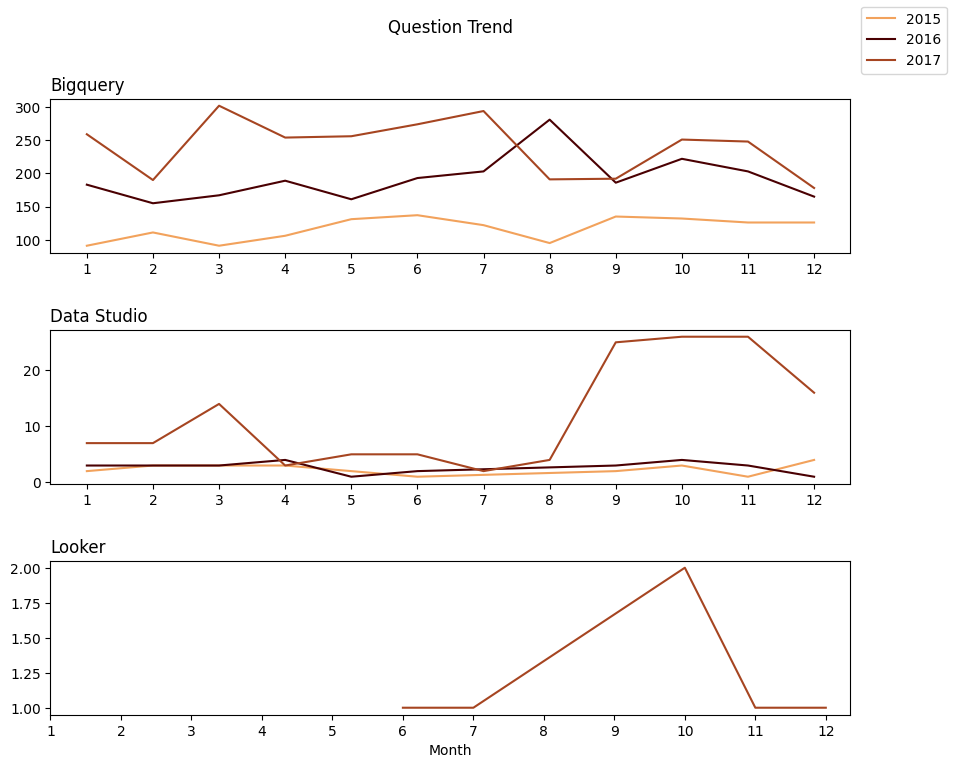

In [46]:
# showing the result by making the visualization using line chart
fig, (ax_bigquery, ax_datastudio, ax_looker) = plt.subplots(nrows=3, ncols=1)

ax_bigquery.set_title("Bigquery", loc='left')
ax_bigquery.plot(bigquery_trends[bigquery_trends['year']==2015]['month'],
                 bigquery_trends[bigquery_trends['year']==2015]['question_count'],
                 color='#F2A25C', label='2015')
ax_bigquery.plot(bigquery_trends[bigquery_trends['year']==2016]['month'],
                 bigquery_trends[bigquery_trends['year']==2016]['question_count'],
                 color='#4A0002', label='2016')
ax_bigquery.plot(bigquery_trends[bigquery_trends['year']==2017]['month'],
                 bigquery_trends[bigquery_trends['year']==2017]['question_count'],
                 color='#A64521', label='2017')
ax_bigquery.set_xticks(np.arange(1,13))

ax_datastudio.set_title("Data Studio", loc='left')
ax_datastudio.plot(datastudio_trends[datastudio_trends['year']==2015]['month'],
                 datastudio_trends[datastudio_trends['year']==2015]['question_count'],
                 color='#F2A25C')
ax_datastudio.plot(datastudio_trends[datastudio_trends['year']==2016]['month'],
                 datastudio_trends[datastudio_trends['year']==2016]['question_count'],
                 color='#4A0002')
ax_datastudio.plot(datastudio_trends[datastudio_trends['year']==2017]['month'],
                 datastudio_trends[datastudio_trends['year']==2017]['question_count'],
                 color='#A64521')
ax_datastudio.set_xticks(np.arange(1,13))

ax_looker.set_title("Looker", loc='left')
ax_looker.plot(looker_trends[looker_trends['year']==2015]['month'],
                 looker_trends[looker_trends['year']==2015]['question_count'],
                 color='#F2A25C')
ax_looker.plot(looker_trends[looker_trends['year']==2016]['month'],
                 looker_trends[looker_trends['year']==2016]['question_count'],
                 color='#4A0002')
ax_looker.plot(looker_trends[looker_trends['year']==2017]['month'],
                 looker_trends[looker_trends['year']==2017]['question_count'],
                 color='#A64521')
ax_looker.set_xticks(np.arange(1,13))
ax_looker.set_xlabel('Month')

fig.subplots_adjust(left=.1, hspace=.5)
fig.set_figheight(8)
fig.set_figwidth(10)
fig.suptitle("Question Trend")
fig.legend()
plt.show()

## Use Case 2 - Brand Ambassador Selection
Branding team wants to feature popular aswer writer in each tags for worldwide brand ambassador launch in Youtube. They want to have at least 10 top candidates in each tag.
<br><br>
Your manager asks you to ensures that the selected writers are only the one who got their accepted answer the most. They also never get minus score for an answer.
<br><br>
**Metrics**: Total accepted answer per answerer userid per tag
<br>
**Key notes**:
- Show top 10 answer writer in each tag (topic)
- Top answer writer are the one who have accepted answer the most & never get a minus score
- Create metrics total accepted answer per answerer userID per tag

In [62]:
# copy the dataset to make the original data safe
data_2 = data.copy()

#### Answer - Show Top 10 Users In Each Tag

In [73]:
# filter the useless column for case 2
data_2_filtered = data_2[['answerer_user_id', 'answer_score', 'question_tag', 'is_accepted_answer']]
data_2_filtered.head(5)

,answerer_user_id,answer_score,question_tag,is_accepted_answer
0,1371484,1,bq,False
1,3624307,1,bq,False
2,1371484,1,bq,False
3,428664,0,bq,False
4,3257867,6,bq,True


In [74]:
# check the data row and column number
data_2_filtered.shape

(6795, 4)

In [75]:
# getting the user id that has minus score in an answer
data_2_user_id_drop_list_temp = data_2_filtered[data_2_filtered['answer_score']<0][['answerer_user_id', 'answer_score']]
data_2_user_id_drop_list_temp

,answerer_user_id,answer_score
64,4502697,-3
148,7296501,-1
257,132438,-2
445,8417967,-1
491,4921951,-2
...,...,...
5952,8533354,-1
6162,7462753,-1
6278,8841057,-1
6529,9221195,-3


In [76]:
# store the unique user id that has minus score in an answer
data_2_user_id_drop_list = data_2_user_id_drop_list_temp['answerer_user_id'].unique()
data_2_user_id_drop_list

<IntegerArray>
[ 4502697,  7296501,   132438,  8417967,  4921951,  5174955, 10461882,
  5157562,  4955600,  7586549,  2165806, 11706377,   175063,   450846,
  2293534,  2271659,  3501729,   826912,  5221944,  3688176,  2628302,
  4798235,  4336570,  6575833,   454810,  1384641,  7254283,  7584694,
  3492285,  5457871,  6342509,  4088642,  8980425,  4845301,  1002277,
 15029835,  2492180,  2932966,  6719378,  1406826,  7336090,  6938128,
  5526783,  6655562, 17663159,  4323708,  5675325, 11069244, 10140223,
  6471743,  8188269,  6461477,  6835318,    33453,  1522467,  6222080,
  1692822,  5265589,  8148244,  8533354,  7462753,  8841057,  9221195,
  3911923]
Length: 64, dtype: Int64

In [81]:
# drop user id that have minus score
data_2_filtered = data_2_filtered[~(data_2_filtered['answerer_user_id'].isin(data_2_user_id_drop_list))]
data_2_filtered

,answerer_user_id,answer_score,question_tag,is_accepted_answer
0,1371484,1,bq,False
1,3624307,1,bq,False
2,1371484,1,bq,False
3,428664,0,bq,False
4,3257867,6,bq,True
...,...,...,...,...
6789,5893695,0,data-studio,False
6790,12892553,0,data-studio,False
6791,568884,1,data-studio,True
6792,6532822,2,bq,True


In [84]:
# check wether the user with minus score still exist or not
data_2_filtered[data_2_filtered['answer_score']<0]

,answerer_user_id,answer_score,question_tag,is_accepted_answer


In [131]:
# creating the 'total accepted answer per answerer userid' metric
total_accepted_answer = pd.DataFrame(data_2_filtered[data_2_filtered['is_accepted_answer']==True].groupby(by=['answerer_user_id',
                                                                                                              'question_tag']).agg({'is_accepted_answer':'count',
                                                                                                                                    'answer_score':'sum'}))

total_accepted_answer.reset_index(level=['answerer_user_id', 'question_tag'], inplace=True)
total_accepted_answer.rename(columns={'answerer_user_id':'User ID',
                                      'question_tag':'Tag',
                                      'is_accepted_answer':'Question Count',
                                      'answer_score':'Sum of Score'}, inplace=True)

total_accepted_answer.sort_values(by=['Question Count', 'Sum of Score'], ascending=False, inplace=True)

total_accepted_answer.head(10)

,User ID,Tag,Question Count,Sum of Score
429,6253347,bq,203,983
36,243782,bq,169,615
329,4490873,bq,123,620
231,2877278,bq,96,266
138,1375400,bq,57,263
304,4001094,bq,46,130
135,1366527,bq,45,269
112,1144035,bq,43,121
368,5071793,bq,27,66
137,1371484,bq,24,57


In [188]:
# devide the metric based on tag
total_accepted_answer_bigquery = total_accepted_answer[total_accepted_answer['Tag']=='bq'].reset_index(drop=True)
total_accepted_answer_datastudio = total_accepted_answer[total_accepted_answer['Tag']=='data-studio'].reset_index(drop=True)
total_accepted_answer_looker = total_accepted_answer[total_accepted_answer['Tag']=='looker'].reset_index(drop=True)

In [189]:
# display the top 10 user id from bigquery tag
total_accepted_answer_bigquery.head(10)

,User ID,Tag,Question Count,Sum of Score
0,6253347,bq,203,983
1,243782,bq,169,615
2,4490873,bq,123,620
3,2877278,bq,96,266
4,1375400,bq,57,263
5,4001094,bq,46,130
6,1366527,bq,45,269
7,1144035,bq,43,121
8,5071793,bq,27,66
9,1371484,bq,24,57


In [190]:
# display the top 10 user id from data studio tag
total_accepted_answer_datastudio.head(10)

,User ID,Tag,Question Count,Sum of Score
0,4024072,data-studio,13,17
1,3832970,data-studio,6,14
2,12892553,data-studio,2,3
3,5959625,data-studio,2,1
4,27048,data-studio,1,66
5,2672106,data-studio,1,14
6,5269121,data-studio,1,7
7,3490987,data-studio,1,4
8,154640,data-studio,1,3
9,4213274,data-studio,1,3


In [191]:
# display the top user id from looker tag
total_accepted_answer_looker.head(10)

,User ID,Tag,Question Count,Sum of Score
0,1904852,looker,1,1


## Use Case 3 - User Activity Segmentation
Product team wants to understand the different persona of their users based on number of question and answers they created
<br><br>
Your manager asks you to create segmentation using rule-based technique. The treshold determination should be based on average of total posts (question or answer) they created per year
<br><br>
Your manager also asks to create visualization of these segments based on year. The visualization should be a stacked-bar-chart where each chart represents a year, the stack will show different colors of segements for PM to understand the trend change in yearly basis
<br><br>

**Segment Details**
|Question created|Answere created|Persona name|
|:--------------:|:-------------:|:----------|
|hi|hi|Inquisitive Guru|
|hi|low|Curious Observer|
|low|hi|Knowledgeable Supporter|
|low|low|Silent Specator|


The threshold determination should be based on average of total posts (question or answer) they created per year. Threshold will be different for question and answer
<br><br>
**Metrics**: UserID count per segmentation per year
<br>
**Hint**: Every year, the threshold change
<br>
**Key notes**:
- Create segmentation using rule-based technique
- Threshold determination should be based on average of total post (question or answer) per year
    - Threshould will be different for question and answer
- Create visualization of the segmentation based on year
    - The visualization should be stacked-bar-chart
    - Each chart represents a year
    - Too show the  trend change in yearly basis

In [140]:
# copy the dataset to make the orginal data safe
data_3 = data.copy()
data_3.dtypes

question_id                 int64
question_owner_user_id      Int64
question_owner_location    object
question_title             object
question_body              object
question_created_date      object
question_score              int64
question_tag               object
answer_id                   Int64
answerer_user_id            Int64
answer_created_date        object
answer_score                Int64
answer_comment_count        Int64
is_accepted_answer           bool
dtype: object

In [150]:
# filter the useless column and create the needed column 'year'
data_3_filtered = data_3[['question_owner_user_id', 'question_created_date', 'answerer_user_id', 'answer_created_date']].copy()
data_3_filtered['question_year'] = pd.to_datetime(data_3_filtered['question_created_date']).dt.year
data_3_filtered['answer_year'] = pd.to_datetime(data_3_filtered['answer_created_date']).dt.year
data_3_filtered.drop(['question_created_date', 'answer_created_date'], axis=1, inplace=True)
data_3_filtered.head(5)

,question_owner_user_id,answerer_user_id,question_year,answer_year
0,3769827,1371484,2015,2015.0
1,2238969,3624307,2015,2015.0
2,4413122,1371484,2015,2015.0
3,4413122,428664,2015,2015.0
4,390973,3257867,2015,2015.0


In [175]:
# change the data type of column that have null value
data_3_filtered['answer_year'] = data_3_filtered['answer_year'].astype('Int64')

In [177]:
# check each column data type
data_3_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6795 entries, 0 to 6794
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   question_owner_user_id  6761 non-null   Int64
 1   answerer_user_id        6385 non-null   Int64
 2   question_year           6795 non-null   int32
 3   answer_year             6393 non-null   Int64
dtypes: Int64(3), int32(1)
memory usage: 205.8 KB


#### Question Part Metric

In [178]:
data_question = data_3_filtered[['question_owner_user_id', 'question_year']].copy()
data_question.head(5)

,question_owner_user_id,question_year
0,3769827,2015
1,2238969,2015
2,4413122,2015
3,4413122,2015
4,390973,2015


In [179]:
overal_question_count = pd.DataFrame(data_question.groupby(by='question_owner_user_id').size())

overal_question_count.reset_index(level=0, inplace=True)

overal_question_count.rename(columns={0:'question_sum'}, inplace=True)

overal_question_count.sort_values(by='question_sum', ascending=False, inplace=True)

overal_question_count.head(5)

,question_owner_user_id,question_sum
815,2877278,65
915,3447653,58
912,3418376,53
65,194000,53
52,132438,43


In [180]:
data_question['question_year'].value_counts()

question_year
2017    3035
2016    2334
2015    1426
Name: count, dtype: int64

In [181]:
question_count_year = pd.DataFrame(data_question.groupby(by=['question_owner_user_id', 'question_year']).size())

question_count_year.reset_index(level=['question_owner_user_id', 'question_year'], inplace=True)

question_count_year.rename(columns={0:'question_sum'}, inplace=True)

question_count_year.sort_values(by='question_sum', ascending=False, inplace=True)

question_count_year.head(5)

,question_owner_user_id,question_year,question_sum
1024,3418376,2017,53
1029,3447653,2016,42
240,651174,2017,36
1035,3469521,2015,33
2366,8192249,2017,32


In [182]:
question_count_year.describe()

,question_owner_user_id,question_year,question_sum
count,2551.0,2551.000000,2551.000000
mean,4250499.741278,2016.278322,2.650333
std,2588015.509999,0.771652,3.375813
min,1109.0,2015.000000,1.000000
25%,1968807.0,2016.000000,1.000000
50%,4398851.0,2016.000000,2.000000
75%,6380132.0,2017.000000,3.000000
max,9140111.0,2017.000000,53.000000


In [183]:
question_threshold = question_count_year.groupby(by='question_year')['question_sum'].mean()
question_threshold

question_year
2015    2.827038
2016    2.777246
2017    2.489695
Name: question_sum, dtype: float64

#### Answer Part Metric

In [184]:
data_answer = data_3_filtered[['answerer_user_id', 'answer_year']].copy()
data_answer.head(5)

,answerer_user_id,answer_year
0,1371484,2015
1,3624307,2015
2,1371484,2015
3,428664,2015
4,3257867,2015


In [185]:
overal_answer_count = pd.DataFrame(data_answer.groupby(by='answerer_user_id').size())

overal_answer_count.reset_index(level=0, inplace=True)

overal_answer_count.rename(columns={0:'answer_sum'}, inplace=True)

overal_answer_count.sort_values(by='answer_sum', ascending=False, inplace=True)

overal_answer_count.head(5)

,answerer_user_id,answer_sum
1164,5221944,1287
1319,6253347,407
94,243782,314
59,132438,267
1022,4490873,247


In [186]:
data_answer['answer_year'].value_counts()

answer_year
2017    2526
2016    1964
2015    1107
2018     237
2019     200
2020     158
2021     136
2022      65
Name: count, dtype: Int64

In [187]:
answer_count_year = pd.DataFrame(data_answer.groupby(by=['answerer_user_id', 'answer_year']).size())

answer_count_year.reset_index(level=['answerer_user_id', 'answer_year'], inplace=True)

answer_count_year.rename(columns={0:'answer_sum'}, inplace=True)

answer_count_year.sort_values(by='answer_sum', ascending=False, inplace=True)

answer_count_year.head(5)

,answerer_user_id,answer_year,answer_sum
1327,5221944,2016,625
1328,5221944,2017,565
1511,6253347,2017,302
334,1002277,2017,185
116,243782,2015,158


In [193]:
answer_count_year.describe()

,answerer_user_id,answer_year,answer_sum
count,2089.0,2089.0,2089.000000
mean,4537531.969363,2017.356151,3.056486
std,3533670.73209,1.820359,21.483346
min,4279.0,2015.0,1.000000
25%,1669372.0,2016.0,1.000000
50%,3995595.0,2017.0,1.000000
75%,6591236.0,2018.0,1.000000
max,19542794.0,2022.0,625.000000


In [194]:
answer_threshold = answer_count_year.groupby(by='answer_year')['answer_sum'].mean()
answer_threshold

answer_year
2015    4.021818
2016    4.224138
2017    3.874233
2018    1.156098
2019    1.158824
2020    1.136691
2021    1.096774
2022    1.083333
Name: answer_sum, dtype: float64

#### Segmentation

In [198]:
question_agg = question_count_year.reset_index(drop=True).copy()
question_agg.head(5)

,question_owner_user_id,question_year,question_sum
0,3418376,2017,53
1,3447653,2016,42
2,651174,2017,36
3,3469521,2015,33
4,8192249,2017,32


In [211]:
question_years = list(question_count_year['question_year'].unique())
question_years

[2017, 2016, 2015]

In [212]:
for year in question_years:
    question_agg.loc[(question_agg['question_year'] == year)
                    & (question_agg['question_sum'] <= question_threshold[year]),
                    'user_question_level'] = 'low'
    question_agg.loc[(question_agg['question_year'] == year)
                    & (question_agg['question_sum'] > question_threshold[year]),
                    'user_question_level'] = 'hi'
question_agg.tail(5)

,question_owner_user_id,question_year,question_sum,user_question_level
2546,5340154,2015,1,low
2547,2034276,2016,1,low
2548,5338218,2017,1,low
2549,2044216,2016,1,low
2550,9140111,2017,1,low


In [213]:
answer_agg = answer_count_year.reset_index(drop=True).copy()
answer_agg.head(5)

,answerer_user_id,answer_year,answer_sum
0,5221944,2016,625
1,5221944,2017,565
2,6253347,2017,302
3,1002277,2017,185
4,243782,2015,158


In [214]:
answer_years = list(answer_count_year['answer_year'].unique())
answer_years

[2016, 2017, 2015, 2019, 2020, 2022, 2018, 2021]

In [215]:
for year in answer_years:
    answer_agg.loc[(answer_agg['answer_year'] == year)
                    & (answer_agg['answer_sum'] <= answer_threshold[year]),
                    'user_answer_level'] = 'low'
    answer_agg.loc[(answer_agg['answer_year'] == year)
                    & (answer_agg['answer_sum'] > answer_threshold[year]),
                    'user_answer_level'] = 'hi'
answer_agg.tail(5)

,answerer_user_id,answer_year,answer_sum,user_answer_level
2084,2693816,2018,1,low
2085,2691366,2018,1,low
2086,2690289,2020,1,low
2087,2677943,2019,1,low
2088,19542794,2022,1,low


In [229]:
users_segmentation = question_agg[['question_owner_user_id',
                                   'user_question_level', 'question_year']].merge(right=answer_agg[['answerer_user_id',
                                                                                   'user_answer_level']],
                                                                 left_on='question_owner_user_id',
                                                                 right_on='answerer_user_id')
users_segmentation.head(5)

,question_owner_user_id,user_question_level,question_year,answerer_user_id,user_answer_level
0,3418376,hi,2017,3418376,low
1,3469521,hi,2015,3469521,low
2,3469521,low,2016,3469521,low
3,8192249,hi,2017,8192249,low
4,2877278,hi,2015,2877278,hi


In [230]:
users_segmentation['question_owner_user_id'].nunique() == users_segmentation['answerer_user_id'].nunique()

True

In [231]:
users_segmentation.drop('answerer_user_id', axis=1, inplace=True)
users_segmentation.rename(columns={'question_owner_user_id':'User ID',
                                   'user_question_level':'Question created',
                                   'user_answer_level':'Answer created',
                                   'question_year':'Year'}, inplace=True)
users_segmentation.head(5)

,User ID,Question created,Year,Answer created
0,3418376,hi,2017,low
1,3469521,hi,2015,low
2,3469521,low,2016,low
3,8192249,hi,2017,low
4,2877278,hi,2015,hi


In [232]:
users_segmentation.loc[(users_segmentation['Question created'] == 'hi')
                       & (users_segmentation['Answer created'] == 'hi'),
                       'Persona name'] = 'Inquisitive Guru'
users_segmentation.loc[(users_segmentation['Question created'] == 'hi')
                       & (users_segmentation['Answer created'] == 'low'),
                       'Persona name'] = 'Curious Observer'
users_segmentation.loc[(users_segmentation['Question created'] == 'low')
                       & (users_segmentation['Answer created'] == 'hi'),
                       'Persona name'] = 'Knowledgable Supporter'
users_segmentation.loc[(users_segmentation['Question created'] == 'low')
                       & (users_segmentation['Answer created'] == 'low'),
                       'Persona name'] = 'Silent Spectator'

users_segmentation.head(10)

,User ID,Question created,Year,Answer created,Persona name
0,3418376,hi,2017,low,Curious Observer
1,3469521,hi,2015,low,Curious Observer
2,3469521,low,2016,low,Silent Spectator
3,8192249,hi,2017,low,Curious Observer
4,2877278,hi,2015,hi,Inquisitive Guru
5,2877278,hi,2015,hi,Inquisitive Guru
6,2877278,hi,2015,low,Curious Observer
7,2877278,hi,2015,hi,Inquisitive Guru
8,2877278,hi,2017,hi,Inquisitive Guru
9,2877278,hi,2017,hi,Inquisitive Guru


In [248]:
users_segmentation_chart_prep = pd.DataFrame(users_segmentation.groupby(by=['Year', 'Persona name']).size())

users_segmentation_chart_prep.reset_index(level=['Year', 'Persona name'], inplace=True)

users_segmentation_chart_prep.rename(columns={0:'Trend'}, inplace=True)

users_segmentation_chart_prep

,Year,Persona name,Trend
0,2015,Curious Observer,73
1,2015,Inquisitive Guru,29
2,2015,Knowledgable Supporter,9
3,2015,Silent Spectator,52
4,2016,Curious Observer,111
5,2016,Inquisitive Guru,35
6,2016,Knowledgable Supporter,6
7,2016,Silent Spectator,118
8,2017,Curious Observer,132
9,2017,Inquisitive Guru,24


In [345]:
users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Inquisitive Guru']['Trend']

1    29
5    35
9    24
Name: Trend, dtype: int64

In [361]:
bottom_val_temp = users_segmentation_chart_prep.pivot(index='Year', columns='Persona name', values='Trend')
bottom_val_temp.head()

Persona name,Curious Observer,Inquisitive Guru,Knowledgable Supporter,Silent Spectator
Year,,,,
2015,73,29,9,52
2016,111,35,6,118
2017,132,24,18,149


In [372]:
bottom_val = bottom_val_temp.copy()
bottom_val['Curious Observer'] = 0
bottom_val['Inquisitive Guru'] = bottom_val_temp['Curious Observer']
bottom_val['Knowledgable Supporter'] = bottom_val_temp['Curious Observer'] + bottom_val_temp['Inquisitive Guru']
bottom_val['Silent Spectator'] = bottom_val_temp['Curious Observer'] + bottom_val_temp['Inquisitive Guru'] + bottom_val_temp['Knowledgable Supporter']
bottom_val.head(5)

Persona name,Curious Observer,Inquisitive Guru,Knowledgable Supporter,Silent Spectator
Year,,,,
2015,0,73,102,111
2016,0,111,146,152
2017,0,132,156,174


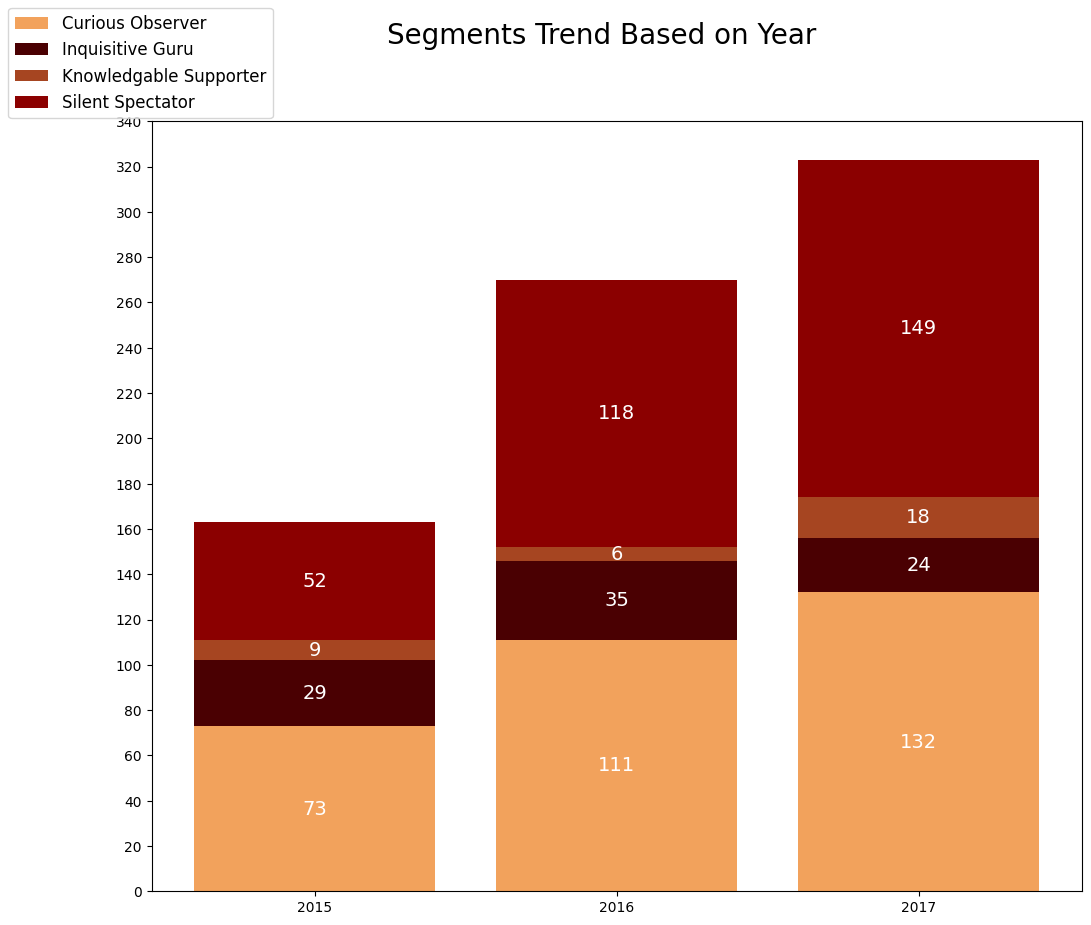

In [395]:
fig, ax = plt.subplots()
bottom_bar = np.zeros(3)
    

container0 = ax.bar(users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Curious Observer']['Year'],
                    users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Curious Observer']['Trend'],
                    label='Curious Observer', color="#F2A25C", bottom=bottom_val['Curious Observer'])
ax.bar_label(container0, label_type='center', color='white', fontsize=14)

container1 = ax.bar(users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Inquisitive Guru']['Year'],
                    users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Inquisitive Guru']['Trend'],
                    label='Inquisitive Guru', color="#4A0002", bottom=bottom_val['Inquisitive Guru'])
ax.bar_label(container1, label_type='center', color='white', fontsize=14)

container2 = ax.bar(users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Knowledgable Supporter']['Year'],
                    users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Knowledgable Supporter']['Trend'],
                    label='Knowledgable Supporter', color="#A64521", bottom=bottom_val['Knowledgable Supporter'])
ax.bar_label(container2, label_type='center', color='white', fontsize=14)

container3 = ax.bar(users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Silent Spectator']['Year'],
                    users_segmentation_chart_prep[users_segmentation_chart_prep['Persona name']=='Silent Spectator']['Trend'],
                    label='Silent Spectator', color="darkred", bottom=bottom_val['Silent Spectator'])
ax.bar_label(container3, label_type='center', color='white', fontsize=14)


ax.set_xticks(users_segmentation_chart_prep['Year'].unique())
ax.set_yticks(np.arange(0, 350, 20))
# ax.set_yticks(False)

fig.suptitle("Segments Trend Based on Year", fontsize=20)
fig.set_figwidth(12)
fig.set_figheight(10)
fig.legend(loc='upper left', fontsize=12)

plt.show()